In [2]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
rsv = pd.read_csv('data/csv/hotel_bookings.csv')

In [4]:
rsv.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
rsv.hotel.unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [6]:
rsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
rsv.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


# Review cancels

In [8]:
rsv.is_canceled[rsv.is_canceled == 1].count() / rsv.is_canceled.count()

0.37041628277075134

-------------------------------------------------------------------
Seems nearly 40% of people ends up canceling, should dig into that.<br/>
Is there anything making people cancel that much?<br/>
is there a season with more cancelations?

-------------------------------------------------------------------

In [9]:
canceled = rsv[rsv.is_canceled == 1]
for year in canceled.arrival_date_year.unique():
    cancel_count = canceled.arrival_date_year[canceled.arrival_date_year == year].count()
    total_count = rsv.arrival_date_year[rsv.arrival_date_year == year].count()
    print(f'year: {year} - {cancel_count} from {total_count} | {cancel_count / total_count}')

year: 2015 - 8142 from 21996 | 0.3701582105837425
year: 2016 - 20337 from 56707 | 0.3586329730015695
year: 2017 - 15745 from 40687 | 0.38697864182662767


----------------------------------------------------
After searching for each year, we can see is not something from one year, is something normal.<br/>
Lets check if is something about customer type

----------------------------------------------------

In [10]:
for cust in canceled.customer_type.unique():
    cust_count = canceled.customer_type[canceled.customer_type == cust].count()
    total_count = rsv.customer_type[rsv.customer_type == cust].count()
    print(f'customer type: {cust} - {cust_count} from {total_count} | {cust_count / total_count}')

customer type: Transient - 36514 from 89613 | 0.4074632028835102
customer type: Contract - 1262 from 4076 | 0.3096172718351325
customer type: Transient-Party - 6389 from 25124 | 0.2542986785543703
customer type: Group - 59 from 577 | 0.1022530329289428


------------------------------------------------
As we can see, most of cancels come from transient customers.<br/>
Transient customers are also the biggest amount of income with difference.<br/>
Is there a special place with more cancels than others?

------------------------------------------------

In [11]:
canceled.hotel
for hotel in canceled.hotel.unique():
    hotel_count = canceled.hotel[canceled.hotel == hotel].count()
    total_count = rsv.hotel[rsv.hotel == hotel].count()
    print(f'Hotel: {hotel} - {hotel_count} from {total_count} | {hotel_count / total_count}')

Hotel: Resort Hotel - 11122 from 40060 | 0.27763354967548676
Hotel: City Hotel - 33102 from 79330 | 0.41726963317786464


---------------------------------------------
City hotels have double of bookings but ~14% more cancels.

---------------------------------------------

In [12]:
rsv.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.083114,-0.020642,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.069741,0.151464,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.063457,0.259095,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.031201,-0.076760,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.001487,0.044858,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.140739,0.066749,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.182382,0.182211,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.035594,0.207793,-0.008283,0.230641,0.014785,0.122884
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,0.041066,0.030931,-0.033273,0.324854,0.056253,0.081745
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.036184,0.019206,-0.010621,0.029186,0.037383,0.097889


------------------------------------------
The biggest correlation is not even 0.3 and is about *lead time*. <br/>
This sawn, means there is no correlation between cancels and any other information in the data.
Sumarizing the only "relation" is long pre-bookings may tend to be canceled.

-------------------------------------------

In [13]:
cancels_year = canceled.groupby(by=['arrival_date_year','hotel'], as_index=False).agg({'adults':'sum','children':'sum','babies':'sum'})

In [14]:
cancels_year

,arrival_date_year,hotel,adults,children,babies
0,2015,City Hotel,11136,90.0,16
1,2015,Resort Hotel,4400,231.0,25
2,2016,City Hotel,28701,1411.0,32
3,2016,Resort Hotel,9492,770.0,65
4,2017,City Hotel,22491,1129.0,16
5,2017,Resort Hotel,7882,1079.0,15


## Reservation cancels over years

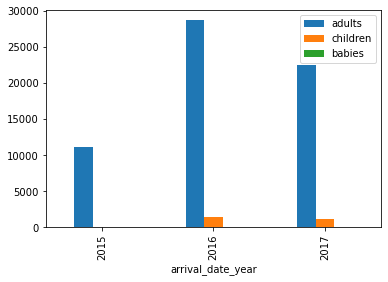

In [15]:
cancels_year[cancels_year.hotel=='City Hotel'].plot(x='arrival_date_year', y=['adults','children','babies'], kind='bar')

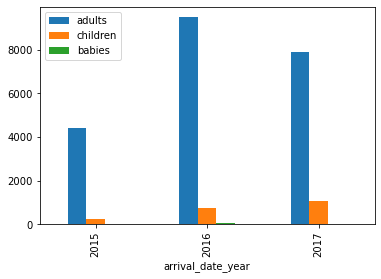

In [16]:
cancels_year[cancels_year.hotel=='Resort Hotel'].plot(x='arrival_date_year', y=['adults','children','babies'], kind='bar')

As we can see, number of cancelations get a high increment during 2016 and even if 2017 has less than 2016 is significantly higher than 2015. <br/>
Lets search if is related to an increment of reservations over years


In [17]:
rsv.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [18]:
not_canceled = rsv[rsv.is_canceled == 0]
not_canceled.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,75166.0,75166.000000,75166.000000,75166.000000,75166.000000,75166.000000,75166.000000,75166.000000,75166.000000,75166.000000,75166.000000,75166.000000,75166.000000,75166.000000,62856.000000,5606.000000,75166.000000,75166.000000,75166.000000,75166.000000
mean,0.0,79.984687,2016.147514,27.080143,15.839529,0.928971,2.464053,1.829737,0.102347,0.010377,0.043344,0.015792,0.202977,0.293364,94.055794,190.519265,1.589868,99.987693,0.099300,0.714060
std,0.0,91.109888,0.703124,13.902478,8.776422,0.993371,1.924803,0.510451,0.390836,0.113007,0.203632,0.272421,1.810713,0.736266,113.947162,132.349286,14.784875,49.206263,0.303176,0.833887
min,0.0,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.0,9.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,51.000000,0.000000,67.500000,0.000000,0.000000
50%,0.0,45.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,183.000000,0.000000,92.500000,0.000000,1.000000
75%,0.0,124.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,270.000000,0.000000,125.000000,0.000000,1.000000
max,0.0,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,4.000000,3.000000,10.000000,1.000000,13.000000,72.000000,21.000000,535.000000,541.000000,379.000000,510.000000,8.000000,5.000000


In [19]:
rsv_year = not_canceled.groupby(by=['arrival_date_year','hotel'], as_index=False).agg({'adults':'sum','children':'sum','babies':'sum'})
rsv_year.head()

,arrival_date_year,hotel,adults,children,babies
0,2015,City Hotel,13249,422.0,68
1,2015,Resort Hotel,11477,614.0,114
2,2016,City Hotel,41867,2403.0,163
3,2016,Resort Hotel,24904,1324.0,203
4,2017,City Hotel,29394,1793.0,97


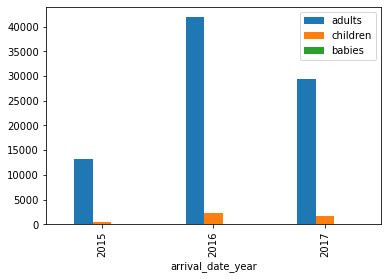

In [20]:
rsv_year[rsv_year.hotel=='City Hotel'].plot(x='arrival_date_year', y=['adults','children','babies'], kind='bar')

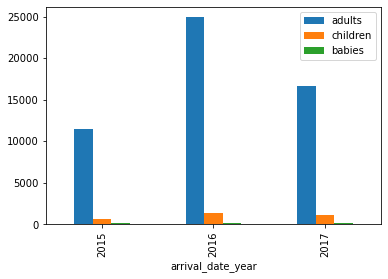

In [22]:
rsv_year[rsv_year.hotel=='Resort Hotel'].plot(x='arrival_date_year', y=['adults','children','babies'], kind='bar')

In [26]:
merged_year = pd.merge(rsv_year, cancels_year, on=['arrival_date_year','hotel'], how='outer')
merged_year.head()

,arrival_date_year,hotel,adults_x,children_x,babies_x,adults_y,children_y,babies_y
0,2015,City Hotel,13249,422.0,68,11136,90.0,16
1,2015,Resort Hotel,11477,614.0,114,4400,231.0,25
2,2016,City Hotel,41867,2403.0,163,28701,1411.0,32
3,2016,Resort Hotel,24904,1324.0,203,9492,770.0,65
4,2017,City Hotel,29394,1793.0,97,22491,1129.0,16


In [27]:
merged_year.columns = ['year','hotel','rsv_adults','rsv_children','rsv_babies','cancel_adults','cancel_children','cancel_babies']
merged_year

,year,hotel,rsv_adults,rsv_children,rsv_babies,cancel_adults,cancel_children,cancel_babies
0,2015,City Hotel,13249,422.0,68,11136,90.0,16
1,2015,Resort Hotel,11477,614.0,114,4400,231.0,25
2,2016,City Hotel,41867,2403.0,163,28701,1411.0,32
3,2016,Resort Hotel,24904,1324.0,203,9492,770.0,65
4,2017,City Hotel,29394,1793.0,97,22491,1129.0,16
5,2017,Resort Hotel,16643,1137.0,135,7882,1079.0,15


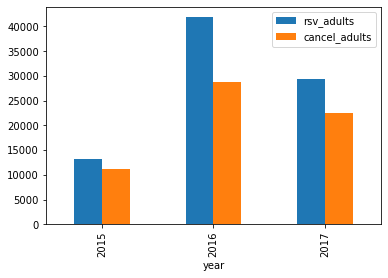

In [29]:
merged_year[merged_year.hotel=='City Hotel'].plot(x='year', y=['rsv_adults','cancel_adults'], kind='bar')

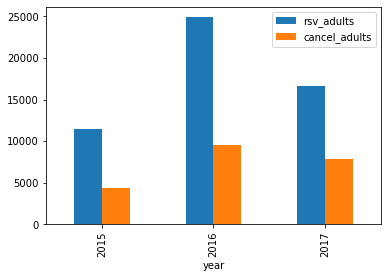

In [30]:
merged_year[merged_year.hotel=='Resort Hotel'].plot(x='year', y=['rsv_adults','cancel_adults'], kind='bar')

now we can confirm that, even if there are less reservations in 2017 over 2016 and there are nearly the same cancels, still is an increment over 2015 but should be careful and review why *City Hotel* has that much cancels